### Савельева Мария, группа ИУ5-24М, РК №2
### Вариант №2. Кластеризация данных.
Данный вариант выполняется на основе материалов лекции.

Необходимо решить задачу кластеризации на основе любого выбранного Вами датасета.

Кластеризуйте данные с помощью трех различных алгоритмов кластеризации. Алгоритмы выбираются произвольным образом, рекомендуется использовать алгоритмы из лекции.

Сравните качество кластеризации для трех алгоритмов с помощью следующих метрик качества кластеризации:

Adjusted Rand index
Adjusted Mutual Information
Homogeneity, completeness, V-measure
Коэффициент силуэта
Сделате выводы о том, какой алгоритм осуществляет более качественную кластеризацию на Вашем наборе данных.

In [79]:
#Импортируем нужные библиотеки:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn import linear_model
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import metrics 
from pandas import DataFrame
%pylab inline

Populating the interactive namespace from numpy and matplotlib


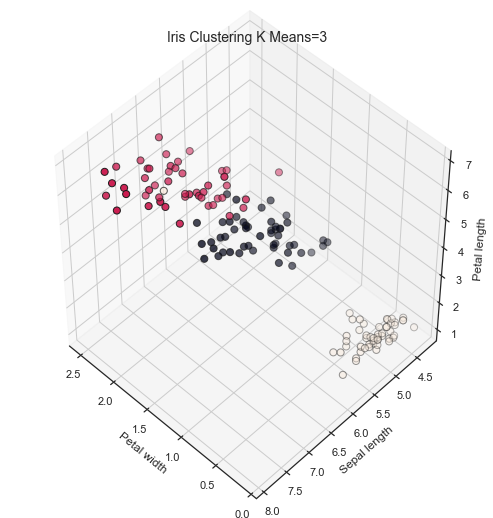

In [72]:
#Iris dataset
iris=datasets.load_iris()
x=iris.data
y=iris.target
#Plotting
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(x[:, 3], x[:, 0], x[:, 2],
          c=labels.astype(np.float), edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Iris Clustering K Means=3", fontsize=14)
plt.show()

### Density-based method DBSCAN

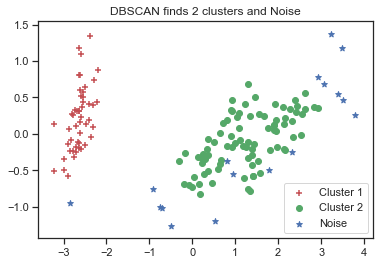

In [75]:
dbscan=DBSCAN()
dbscan.fit(x)
pca=PCA(n_components=2).fit(x)
pca_2d=pca.transform(x)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

### Метод Hierarchical

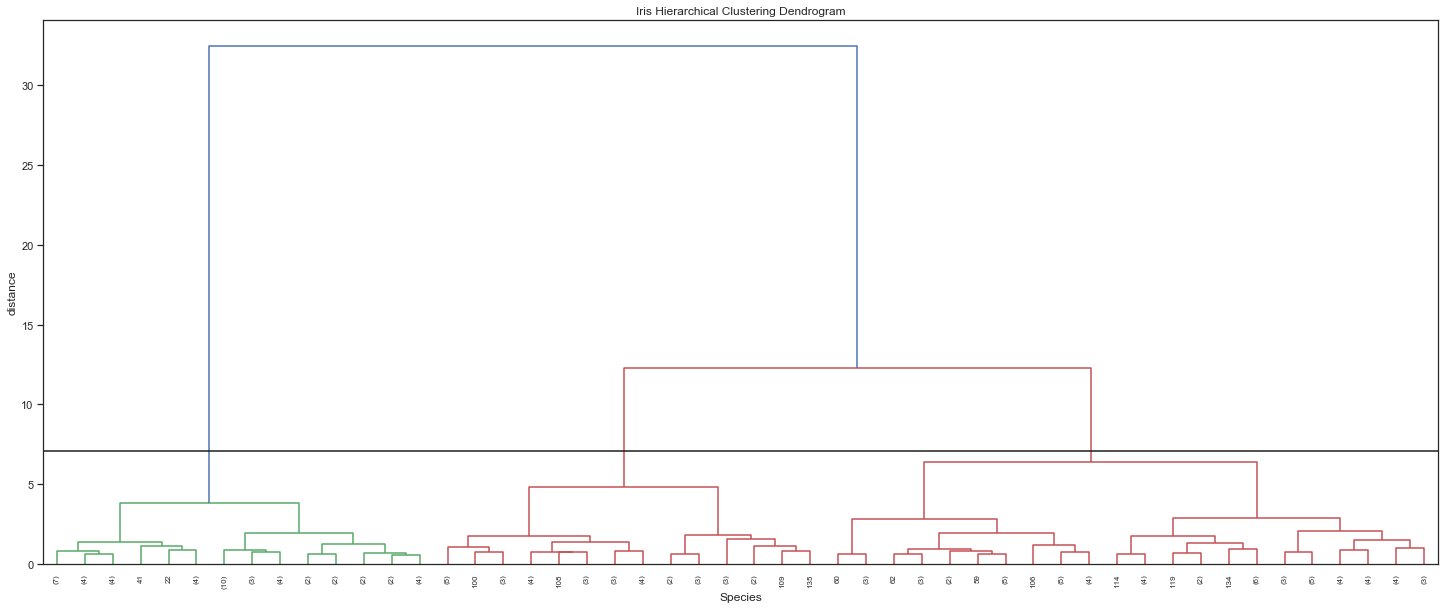

In [80]:
#Hierachy Clustering 
hier=linkage(x,"ward")
max_d=7.08
plt.figure(figsize=(25,10))
plt.title('Iris Hierarchical Clustering Dendrogram')
plt.xlabel('Species')
plt.ylabel('distance')
dendrogram(
    hier,
    truncate_mode='lastp',  
    p=50,                  
    leaf_rotation=90.,      
    leaf_font_size=8.,     
)
plt.axhline(y=max_d, c='k')
plt.show()

In [97]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

data = datasets.load_iris()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=3, random_state=1))
algorithms.append(DBSCAN())
algorithms.append(AgglomerativeClustering(n_clusters=3))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)}))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity',
                                           'Completeness', 'V-measure', 
                                           'Silhouette'],
                       index=['K-means', 'DBSCAN', 'Agglomerative'])

results

,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.730238,0.748372,0.751485,0.764986,0.758176,0.552819
DBSCAN,0.520619,0.554365,0.559946,0.656558,0.604416,0.486034
Agglomerative,0.731199,0.757803,0.760801,0.779596,0.770084,0.554324


#### Исходя их полученных результатов кластеризайии и сравнения, наилучшим вариантом кластеризации для выбранного датасета стал метод иерархической кластеризации.